In [ ]:
#https://www.statsmodels.org/stable/examples/notebooks/generated/markov_regression.html

In [1]:
#system packages

import sys
import warnings
import os 
import traceback #obs? 
if not sys.warnoptions:
    warnings.filterwarnings("once")  

In [2]:
#base packages:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats, integrate, optimize
import math
import datetime
from datetime import date, timedelta

In [3]:
#optional packages

from statsmodels.tsa.base.datetools import dates_from_str
from IPython.display import display
pd.options.display.max_columns = 50  #allow DF.head to show all columns in notebook
from see import see
from tabulate import tabulate 
#from io import StringIO

In [4]:
#packages for the econometrics / models

from statsmodels.tsa.vector_ar import vecm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron, ZivotAndrews
from arch.unitroot.cointegration import engle_granger, phillips_ouliaris
import statsmodels.formula.api as smf  #VAR package contained within 
import statsmodels.tsa.api as smt

#import the functionality for detecting mathematical errors (E.G. types of linear algebra issues etc.)
from statsmodels.tools.sm_exceptions import ValueWarning
from arch.utility.exceptions import (
    InfeasibleTestException,
    InvalidLengthWarning,
    invalid_length_doc)
warnings.filterwarnings("once", category = ValueWarning)

C:\Users\JasonSpano\anaconda3\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [10]:
import statsmodels.api as sm


In [5]:
sorted_alldata_df_final = pd.read_pickle(r"C:\Users\JasonSpano\OneDrive\Uva Msc 19-20 Subjects\Research Assistant Docs\CDS_project_-_first_set_of_tasks\Part 2_jan20./sorted_alldata_df_final.pkl")

In [ ]:
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
mod_fedfunds = sm.tsa.MarkovRegression(dta_fedfunds, k_regimes=2)
res_fedfunds = mod_fedfunds.fit()


In [6]:
#pick a sample GVKEY:
gvkey_1045 = sorted_alldata_df_final.loc[sorted_alldata_df_final.gvkey==1045]

In [17]:
gvkey_frame = gvkey_1045


cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
#vix = gvkey_frame['cboe_vix']

gvkey_frame_ms = pd.DataFrame(data=(cds))

gvkey_frame_ms_model = sm.tsa.MarkovRegression(gvkey_frame_ms, k_regimes=2)

res_gvkey_frame_ms_model = gvkey_frame_ms_model.fit()

print(res_gvkey_frame_ms_model.summary())

                        Markov Switching Model Results                        
Dep. Variable:      market_cds_spread   No. Observations:                  546
Model:               MarkovRegression   Log Likelihood               -3800.365
Date:                Tue, 27 Oct 2020   AIC                           7610.729
Time:                        16:05:45   BIC                           7632.242
Sample:                             0   HQIC                          7619.139
                                - 546                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1462.7267     15.101     96.860      0.000    1433.128    1492.325
                             Regime 1 parameters    

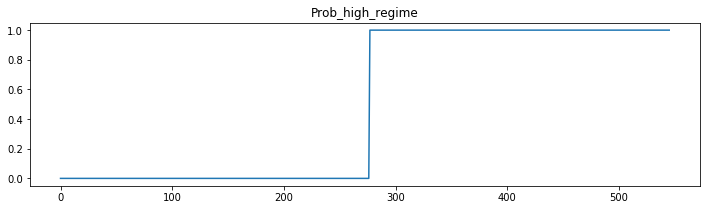

In [19]:
res_gvkey_frame_ms_model.smoothed_marginal_probabilities[1].plot(title='Pr(High Regime)',
                                                                figsize=(12,3));

In [20]:
#From the estimated transition matrix we can calculate the expected duration of a low regime versus a high regime.
print(res_gvkey_frame_ms_model.expected_durations)

[551.13730704 540.90648847]


In [ ]:
#switching intercept and lagged dependent variable

In [21]:
gvkey_frame = gvkey_1045

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']

gvkey_frame_ms = pd.DataFrame(data=(cds, pecds)).T

#with switching intercept and lagged dependent variable
res_gvkey_frame_ms_model_2 = sm.tsa.MarkovRegression(gvkey_frame_ms['market_cds_spread'],
                                                     k_regimes=2, 
                                                     exog=gvkey_frame_ms['pecds'])

res_gvkey_frame_ms_model_2 = res_gvkey_frame_ms_model_2.fit()

print(res_gvkey_frame_ms_model_2.summary())

                        Markov Switching Model Results                        
Dep. Variable:      market_cds_spread   No. Observations:                  546
Model:               MarkovRegression   Log Likelihood               -3786.866
Date:                Tue, 27 Oct 2020   AIC                           7587.732
Time:                        16:12:07   BIC                           7617.851
Sample:                             0   HQIC                          7599.506
                                - 546                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1005.0053     88.245     11.389      0.000     832.048    1177.962
x1            15.4755      2.942      5.261      0.0

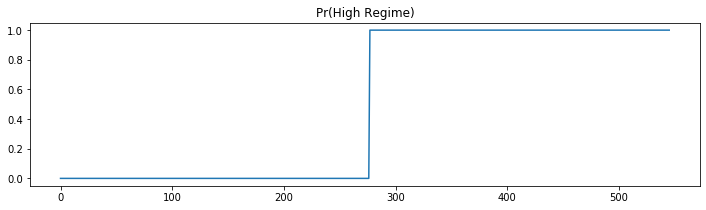

In [23]:
res_gvkey_frame_ms_model_2.smoothed_marginal_probabilities[1].plot(title='Pr(High Regime)',
                                                                figsize=(12,3));

In [24]:
#From the estimated transition matrix we can calculate the expected duration of a low regime versus a high regime.
print(res_gvkey_frame_ms_model_2.expected_durations)

[550.58287636 540.77126786]


In [25]:
#further regimes = taylor rule etc.

## We can also accommodate switching variances. In particular, we consider the model

In [ ]:
from statsmodels.tsa.regime_switching.tests.test_markov_regression import areturns

In [ ]:
#change to "areturns" 

In [ ]:
gvkey_frame = gvkey_1045

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']

gvkey_frame_ms = pd.DataFrame(data=(cds, pecds)).T

#with switching intercept and lagged dependent variable
res_gvkey_frame_ms_model_2 = sm.tsa.MarkovRegression(gvkey_frame_ms['market_cds_spread'],
                                                     k_regimes=2, 
                                                     exog=gvkey_frame_ms['pecds'])

res_gvkey_frame_ms_model_2 = res_gvkey_frame_ms_model_2.fit()

print(res_gvkey_frame_ms_model_2.summary())